# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load The Airbnb Data](#2.4_Load_The_Airbnb_Data)
  * [2.5 Explore The Data](#2.5_Explore_The_Data)
    * [2.5.1 Find The Data that I Need](#2.5.1_Find_The_Data_that_I_Need)
    * [2.5.2 Number Of Missing Values By Column](#2.5.2_Number_Of_Missing_Values_By_Column)
    * [2.5.3 Categorical Features](#2.5.3_Categorical_Features)
      * [2.5.3.1 Unique home_type Names](#2.5.3.1_Unique_home_type_Names)
      * [2.5.3.2 Area](#2.5.3.2_Area)
      * [2.5.3.3 Number of distinct regions](#2.5.3.3_Number_of_distinct_regions)
      * [2.5.3.4 Distribution By property_type and area](#2.5.3.4_Distribution_By_property_type_and_area)
      * [2.5.3.5 Distribution Of Average of price, review_scores_rating and review_scores_location By property_type and area](#2.5.3.5_Distribution_Of_Average_of_price_,_review_scores_rating_and_review_scores_location_By_property_type_and_area)
        * [2.5.3.5.1 Average of price by property_type and area](#2.5.3.5.1_Average_of_price_by_property_type_and_area)
        * [2.5.3.5.2 Average of review_scores_location and review_score_rating By area](#2.5.3.5.2_Average_of_review_scores_location_and_review_score_rating_By_area)
        * [2.5.3.5.3 Distribution of review_score_location, review_score_rating and price by area](#2.5.3.5.3_Distribution_of_review_score_location_,_review_score_rating_and_price_by_area)
        * [2.5.3.5.4 Distribution of price by area](#2.5.3.5.4_Distribution_of_price_by_area)
        * [2.5.3.5.5 Distribution of room_type by area](#2.5.3.5.5_Distribution_of_room_type_by_area)
    * [2.5.4 Numeric Features](#2.5.4_Numeric_Features)
      * [2.5.4.1 Numeric data summary](#2.5.4.1_Numeric_data_summary)
      * [2.5.4.2 Distributions Of Feature Values](#2.5.4.2_Distributions_Of_Feature_Values)
        * [2.5.4.2.1 Reviews_per_month](#2.5.4.2.1_Reviews_per_month)
        * [2.5.4.2.2 Price](#2.5.4.2.2_Price)
        * [2.5.4.2.3 Review scores (review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value)](#2.5.4.2.3_Review_scores_(review_scores_rating_,_review_scores_accuracy_,_review_scores_cleanliness_,_review_scores_checkin_,_review_scores_communication_,_review_scores_location_,_review_scores_value)
        * [2.5.4.2.4 Bedrooms and Bathrooms](#2.5.4.2.4_Bedrooms_and_Bathrooms)
  * [2.6 Derive Area-wide Summary Statistics In Distinct Area](#2.6_Derive_Area-wide_Summary_Statistics_In_Distinct_Area)
  * [2.7 Drop Rows With No Price Data](#2.7_Drop_Rows_With_No_Price_Data)
  * [2.8 Review Summary Distribution](#2.8_Review_Summary_Distribution)
  * [2.9 Add Area Population and Region Area to Summary](#2.9_Add_Area_Population_and_Region_Area_to_Summary)
  * [2.10 Target Feature (Price)](#2.10_Target_Feature_(Price))
    * [2.10.1 Number and Percentage of Missing Values](#2.10.1_Number_and_Percentage_of_Missing_Values)
  * [2.11 Save data](#2.12_Save_data)
  * [2.12 Summary](#2.13_Summary)


## 2.2 Introduction<a id='2.2_Introduction'></a>

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

### 2.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

How can we predict the price from the number of bathrooms, the number of bedrooms, and locations in 2023 in Denver? And also, how can we predict the price from the reviews per month, the review scores of ratings, accuracy, cleanliness, check-in, communication, location, and value in 2023 in Denver?

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# from library.sb_utils import save_file

## 2.4 Load The Airbnb Data<a id='2.4_Load_The_Airbnb_Data'></a>

In [2]:
airbnb_denver = pd.read_csv('listings_v1.csv')

Good first steps in auditing the data are the info method and displaying the first few records with head.

In [3]:
airbnb_denver.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6.070000e+17,https://www.airbnb.com/rooms/607435380788232654,2.020000e+13,12/29/2023,city scrape,Home in Denver · 1 bedroom · 1 bed · 1 shared ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,430149575,...,3.50,4.00,3.00,NaN,f,6,2,4,0,0.11
1,5.460000e+17,https://www.airbnb.com/rooms/545714833502855511,2.020000e+13,12/29/2023,city scrape,Rental unit in Denver · 2 bedrooms · 3 beds · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,169214047,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,4.392021e+07,https://www.airbnb.com/rooms/43920210,2.020000e+13,12/29/2023,previous scrape,Guest suite in Denver · ★4.38 · 3 bedrooms · 4...,NaN,NaN,https://a0.muscache.com/pictures/2c67d672-58b4...,3484713,...,4.62,4.38,4.38,2021-BFN-0000590,f,2,2,0,0,0.31
3,5.242953e+07,https://www.airbnb.com/rooms/52429527,2.020000e+13,12/29/2023,previous scrape,Townhouse in Denver · ★4.78 · 3 bedrooms · 4 b...,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,107279139,...,4.78,4.93,4.59,2021-BFN-0005677,f,20,20,0,0,2.52
4,6.320000e+17,https://www.airbnb.com/rooms/632494576047532593,2.020000e+13,12/29/2023,previous scrape,Townhouse in Denver · ★New · 2 bedrooms · 2 be...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,416194740,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


This immediately raises the question of what quantity will you want to model? You know you want to model the price.

## 2.5 Explore The Data<a id='2.5_Explore_The_Data'></a>

##### 2.5.1 Find The Data that I Need<a id='2.5.1_Find_The_Data_that_I_Need'></a>

In [4]:
airbnb_denver.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

The columns that I need:

'id', 'name', 'host_id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'bathrooms_text', 'beds', 'price', 'number_of_reviews', 'last_scraped', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value','reviews_per_month'


In [5]:
list = ['id', 'name', 'host_id', 'neighbourhood_cleansed',
        'latitude', 'longitude', 'property_type', 'room_type', 'bathrooms_text', 'beds',
        'number_of_reviews', 'last_scraped',
        'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
        'review_scores_communication', 'review_scores_location', 'review_scores_value','reviews_per_month', 'price']
airbnb_denver = airbnb_denver.loc[:, list]
airbnb_denver.head()

,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,beds,...,last_scraped,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price
0,6.070000e+17,Home in Denver · 1 bedroom · 1 bed · 1 shared ...,430149575,North Park Hill,39.760390,-104.92968,Private room in home,Private room,1 shared bath,1.0,...,12/29/2023,3.00,2.50,2.50,3.00,3.50,4.00,3.00,0.11,$35.00
1,5.460000e+17,Rental unit in Denver · 2 bedrooms · 3 beds · ...,169214047,Hale,39.727850,-104.93783,Entire rental unit,Entire home/apt,2 baths,3.0,...,12/29/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$149.00
2,4.392021e+07,Guest suite in Denver · ★4.38 · 3 bedrooms · 4...,3484713,Sloan Lake,39.753980,-105.03047,Entire guest suite,Entire home/apt,2 baths,4.0,...,12/29/2023,4.38,4.31,4.54,4.62,4.62,4.38,4.38,0.31,NaN
3,5.242953e+07,Townhouse in Denver · ★4.78 · 3 bedrooms · 4 b...,107279139,Five Points,39.758520,-104.98846,Entire townhouse,Entire home/apt,2.5 baths,4.0,...,12/29/2023,4.78,4.88,4.62,4.78,4.78,4.93,4.59,2.52,$190.00
4,6.320000e+17,Townhouse in Denver · ★New · 2 bedrooms · 2 be...,416194740,West Colfax,39.736019,-105.05072,Entire townhouse,Entire home/apt,2.5 baths,2.0,...,12/29/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$87.00


In [6]:
airbnb_denver = airbnb_denver.rename(columns={'name' : 'description', 'bathrooms_text' : 'bathrooms', 'beds' : 'bedrooms',
                                         'neighbourhood_cleansed' : 'area'})

In [7]:
airbnb_denver.columns

Index(['id', 'description', 'host_id', 'area', 'latitude', 'longitude',
       'property_type', 'room_type', 'bathrooms', 'bedrooms',
       'number_of_reviews', 'last_scraped', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'price'],
      dtype='object')

### 2.5.2 Number Of Missing Values By Column<a id='2.5.2_Number_Of_Missing_Values_By_Column'></a>

Count the number of missing values in each column and sort them.

In [8]:
missing = pd.concat([airbnb_denver.isnull().sum(), 100 * airbnb_denver.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
reviews_per_month,757,15.228324
review_scores_rating,756,15.208208
review_scores_value,756,15.208208
review_scores_location,756,15.208208
review_scores_communication,756,15.208208
review_scores_checkin,756,15.208208
review_scores_cleanliness,756,15.208208
review_scores_accuracy,756,15.208208
price,82,1.649567
bedrooms,65,1.307584


### 2.5.3 Categorical Features<a id='2.5.3_Categorical_Features'></a>

description, area, property_type, room_type, bathrooms, and last_scraped are object in the dataframe

In [9]:
airbnb_denver.dtypes

id                             float64
description                     object
host_id                          int64
area                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
bathrooms                       object
bedrooms                       float64
number_of_reviews                int64
last_scraped                    object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
price                           object
dtype: object

I want to add 'home_type' column that is a first word of desciption that shows the type of home

In [10]:
airbnb_denver['home_type'] = airbnb_denver['description'].str.split(' ').str[0]
airbnb_denver.head()

,id,description,host_id,area,latitude,longitude,property_type,room_type,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price,home_type
0,6.070000e+17,Home in Denver · 1 bedroom · 1 bed · 1 shared ...,430149575,North Park Hill,39.760390,-104.92968,Private room in home,Private room,1 shared bath,1.0,...,3.00,2.50,2.50,3.00,3.50,4.00,3.00,0.11,$35.00,Home
1,5.460000e+17,Rental unit in Denver · 2 bedrooms · 3 beds · ...,169214047,Hale,39.727850,-104.93783,Entire rental unit,Entire home/apt,2 baths,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$149.00,Rental
2,4.392021e+07,Guest suite in Denver · ★4.38 · 3 bedrooms · 4...,3484713,Sloan Lake,39.753980,-105.03047,Entire guest suite,Entire home/apt,2 baths,4.0,...,4.38,4.31,4.54,4.62,4.62,4.38,4.38,0.31,NaN,Guest
3,5.242953e+07,Townhouse in Denver · ★4.78 · 3 bedrooms · 4 b...,107279139,Five Points,39.758520,-104.98846,Entire townhouse,Entire home/apt,2.5 baths,4.0,...,4.78,4.88,4.62,4.78,4.78,4.93,4.59,2.52,$190.00,Townhouse
4,6.320000e+17,Townhouse in Denver · ★New · 2 bedrooms · 2 be...,416194740,West Colfax,39.736019,-105.05072,Entire townhouse,Entire home/apt,2.5 baths,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$87.00,Townhouse


In [11]:
airbnb_denver['home_type'].unique()

array(['Home', 'Rental', 'Guest', 'Townhouse', 'Guesthouse', 'Condo',
       'Bungalow', 'Boutique', 'Hostel', 'Bed', 'Loft', 'casa', 'Hotel',
       'Aparthotel', 'Place', 'Serviced', 'Tiny', 'Cottage', 'Tent',
       'Vacation', 'Villa', 'Castle', 'Camper/RV'], dtype=object)

#### 2.5.3.1 Unique home_type Names<a id='2.5.3.1_Unique_home_type_Names'></a>

In [12]:
airbnb_denver['home_type'].unique()

array(['Home', 'Rental', 'Guest', 'Townhouse', 'Guesthouse', 'Condo',
       'Bungalow', 'Boutique', 'Hostel', 'Bed', 'Loft', 'casa', 'Hotel',
       'Aparthotel', 'Place', 'Serviced', 'Tiny', 'Cottage', 'Tent',
       'Vacation', 'Villa', 'Castle', 'Camper/RV'], dtype=object)

In [13]:
airbnb_denver['area'].unique()

array(['North Park Hill', 'Hale', 'Sloan Lake', 'Five Points',
       'West Colfax', 'Sunnyside', 'Jefferson Park', 'Chaffee Park',
       'West Highland', 'Highland', 'Union Station', 'Cole',
       'City Park West', 'Lincoln Park', 'North Capitol Hill', 'CBD',
       'East Colfax', 'Barnum', 'Gateway - Green Valley Ranch',
       'Capitol Hill', 'Speer', 'Washington Park West', 'Hilltop',
       'Whittier', 'Cherry Creek', 'Cheesman Park', 'University',
       'Lowry Field', 'Stapleton', 'Cory - Merrill', 'City Park', 'Regis',
       'Congress Park', 'Washington Virginia Vale', 'Skyland',
       'Civic Center', 'College View - South Platte', 'Elyria Swansea',
       'Clayton', 'Mar Lee', 'Ruby Hill', 'Northeast Park Hill',
       'Athmar Park', 'Platt Park', 'Baker', 'Villa Park',
       'University Hills', 'Montclair', 'Berkeley', 'Virginia Village',
       'Montbello', 'Goldsmith', 'Overland', 'Belcaro', 'Country Club',
       'Harvey Park', 'Hampden', 'Barnum West', 'Harvey Park S

In [14]:
airbnb_denver['property_type'].unique()

array(['Private room in home', 'Entire rental unit', 'Entire guest suite',
       'Entire townhouse', 'Entire home', 'Entire guesthouse',
       'Entire condo', 'Entire bungalow', 'Private room in bungalow',
       'Private room in guest suite', 'Room in boutique hotel',
       'Room in hostel', 'Private room in bed and breakfast',
       'Entire loft', 'Private room in townhouse',
       'Private room in condo', 'Casa particular', 'Room in hotel',
       'Shared room in home', 'Private room in rental unit',
       'Room in aparthotel', 'Entire place', 'Shared room in townhouse',
       'Entire serviced apartment', 'Tiny home', 'Entire cottage', 'Tent',
       'Private room in hostel', 'Entire vacation home',
       'Shared room in hostel', 'Private room in villa',
       'Private room in cottage', 'Castle',
       'Private room in casa particular', 'Shared room in rental unit',
       'Entire villa', 'Shared room', 'Camper/RV',
       'Private room in serviced apartment', 'Private roo

#### 2.5.3.2 Area<a id='2.5.3.2_Area'></a>

In [15]:
airbnb_denver['area'].unique()

array(['North Park Hill', 'Hale', 'Sloan Lake', 'Five Points',
       'West Colfax', 'Sunnyside', 'Jefferson Park', 'Chaffee Park',
       'West Highland', 'Highland', 'Union Station', 'Cole',
       'City Park West', 'Lincoln Park', 'North Capitol Hill', 'CBD',
       'East Colfax', 'Barnum', 'Gateway - Green Valley Ranch',
       'Capitol Hill', 'Speer', 'Washington Park West', 'Hilltop',
       'Whittier', 'Cherry Creek', 'Cheesman Park', 'University',
       'Lowry Field', 'Stapleton', 'Cory - Merrill', 'City Park', 'Regis',
       'Congress Park', 'Washington Virginia Vale', 'Skyland',
       'Civic Center', 'College View - South Platte', 'Elyria Swansea',
       'Clayton', 'Mar Lee', 'Ruby Hill', 'Northeast Park Hill',
       'Athmar Park', 'Platt Park', 'Baker', 'Villa Park',
       'University Hills', 'Montclair', 'Berkeley', 'Virginia Village',
       'Montbello', 'Goldsmith', 'Overland', 'Belcaro', 'Country Club',
       'Harvey Park', 'Hampden', 'Barnum West', 'Harvey Park S

#### 2.5.3.3 Number of distinct regions<a id='2.5.3.3_Number_of_distinct_regions'></a>

In [16]:
airbnb_denver[['area']].nunique()

area    77
dtype: int64

#### 2.5.3.4 Distribution By property_type and area<a id='2.5.3.4_Distribution_By_property_type_and_area'></a>

If this is your first time using [matplotlib](https://matplotlib.org/3.2.2/index.html)'s [subplots](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.subplots.html), you may find the online documentation useful.

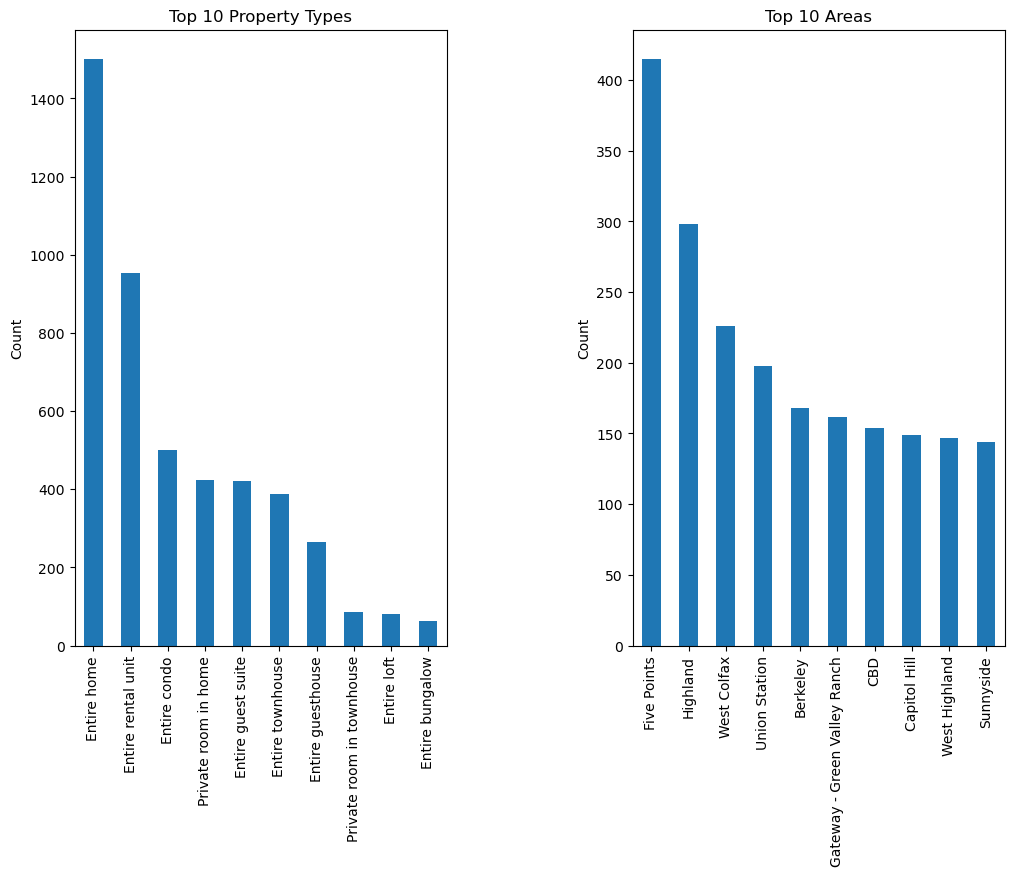

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
airbnb_denver.property_type.value_counts().nlargest(10).plot(kind='bar', ax=ax[0])
ax[0].set_title('Top 10 Property Types')
ax[0].set_ylabel('Count')

airbnb_denver.area.value_counts().nlargest(10).plot(kind='bar', ax=ax[1])
ax[1].set_title('Top 10 Areas')
ax[1].set_ylabel('Count')
plt.subplots_adjust(wspace=0.5);

In [18]:
(airbnb_denver[['property_type']] == 'Entire home').value_counts()

property_type
False            3470
True             1501
dtype: int64

In [19]:
(airbnb_denver[['area']] == 'Five Points').value_counts()

area 
False    4556
True      415
dtype: int64

How's your geography? Looking at the distribution of area, you see Five Points accounting for the majority of the area. Looking at the distribution of property_type, you see Home accounting for the majority of the Entire home. It was a useful predictor of price. Would you want a model that is skewed for accuracy by Five Points or Entire home? 
A boxplot grouped by area is an ideal way to quickly compare prices.

#### 2.5.3.5 Distribution Of Average of price, review_scores_rating and review_scores_location By property_type and area<a id='2.5.3.5_Distribution_Of_Average_of_price_,_review_scores_rating_and_review_scores_location_By_property_type_and_area'></a>

##### 2.6.3.5.1 Average of price by property_type and area<a id='2.6.3.5.1_Average_of_price_by_property_type_and_area'></a>

The price column is object. we need to have the numeric value

In [20]:
airbnb_denver['price'].unique()

array(['$35.00 ', '$149.00 ', nan, '$190.00 ', '$87.00 ', '$300.00 ',
       '$408.00 ', '$121.00 ', '$561.00 ', '$128.00 ', '$93.00 ',
       '$319.00 ', '$143.00 ', '$165.00 ', '$33.00 ', '$295.00 ',
       '$60.00 ', '$141.00 ', '$192.00 ', '$90.00 ', '$65.00 ', '$86.00 ',
       '$130.00 ', '$95.00 ', '$276.00 ', '$157.00 ', '$68.00 ',
       '$88.00 ', '$150.00 ', '$135.00 ', '$110.00 ', '$850.00 ',
       '$82.00 ', '$451.00 ', '$120.00 ', '$84.00 ', '$104.00 ',
       '$77.00 ', '$129.00 ', '$115.00 ', '$521.00 ', '$108.00 ',
       '$314.00 ', '$203.00 ', '$156.00 ', '$180.00 ', '$103.00 ',
       '$139.00 ', '$92.00 ', '$91.00 ', '$50.00 ', '$94.00 ', '$99.00 ',
       '$71.00 ', '$147.00 ', '$126.00 ', '$207.00 ', '$43.00 ',
       '$78.00 ', '$399.00 ', '$227.00 ', '$210.00 ', '$131.00 ',
       '$824.00 ', '$250.00 ', '$107.00 ', '$61.00 ', '$83.00 ',
       '$66.00 ', '$56.00 ', '$160.00 ', '$76.00 ', '$75.00 ', '$63.00 ',
       '$125.00 ', '$96.00 ', '$198.00 ', '$85.00 

In [21]:
airbnb_denver['price'] = pd.to_numeric(airbnb_denver['price'].replace('[/$,]', '', regex=True), errors='coerce')
print(airbnb_denver['price'].dtypes)

float64


In [22]:
property_type_price_mean = airbnb_denver.groupby('property_type')['price'].mean().sort_values(ascending=False)
property_type_price_mean.head()

property_type
Shared room in townhouse    2094.000000
Castle                       678.000000
Entire villa                 388.000000
Entire townhouse             323.896277
Private room in hostel       310.000000
Name: price, dtype: float64

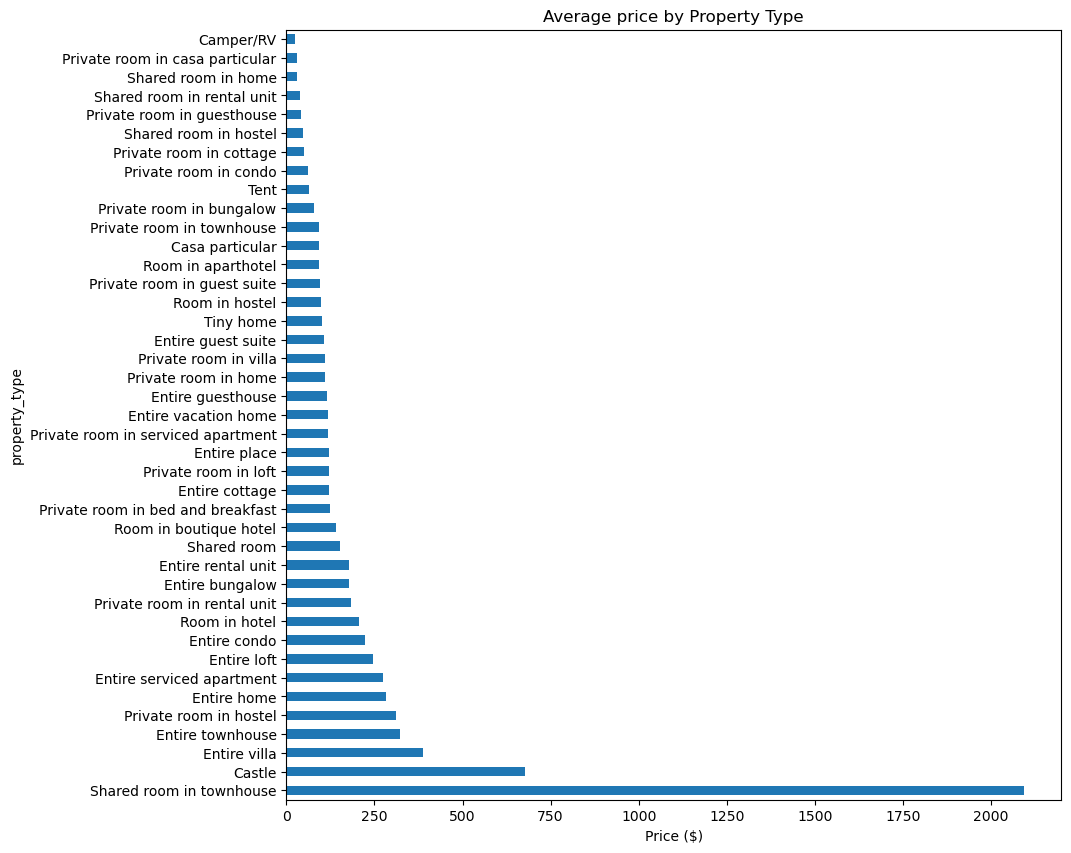

In [23]:
(property_type_price_mean
    .sort_values(ascending=False)
    .plot(kind='barh', figsize=(10, 10), title='Average price by Property Type'))
plt.xlabel('Price ($)');

In [24]:
area_price_mean = airbnb_denver.groupby('area')['price'].mean().sort_values(ascending=False)
area_price_mean.head()

area
Cheesman Park      619.846154
West Highland      465.826087
Speer              459.462687
University Park    408.133333
Sloan Lake         361.130435
Name: price, dtype: float64

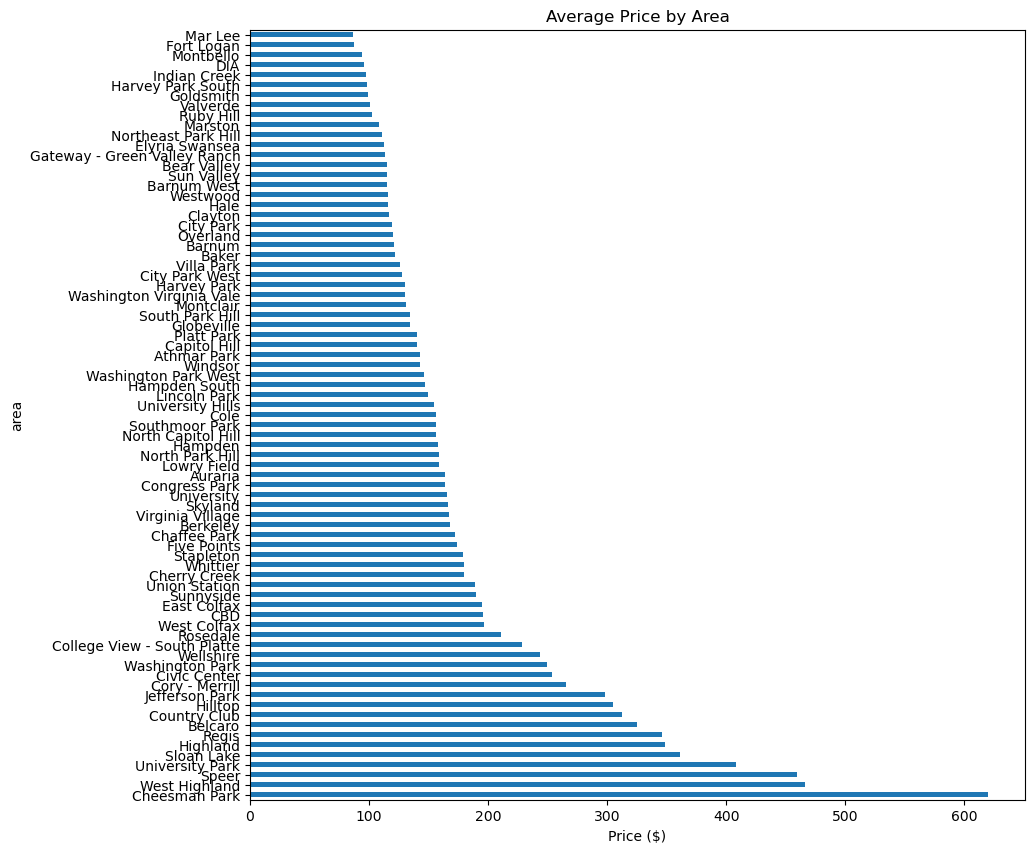

In [25]:
(area_price_mean
    .sort_values(ascending=False)
    .plot(kind='barh', figsize=(10, 10), title='Average Price by Area'))
plt.xlabel('Price ($)');

##### 2.5.3.5.2 Average of review_scores_location and review_score_rating By area<a id='2.5.3.5.2_Average_of_review_scores_location_and_review_score_rating_By_area'></a>

In [26]:
review_scores_location_mean_area = airbnb_denver.groupby('area')['review_scores_location'].mean()
review_scores_location_mean_area.head().sort_values(ascending=False)

area
Auraria        4.996667
Baker          4.846330
Athmar Park    4.713191
Barnum West    4.713182
Barnum         4.658148
Name: review_scores_location, dtype: float64

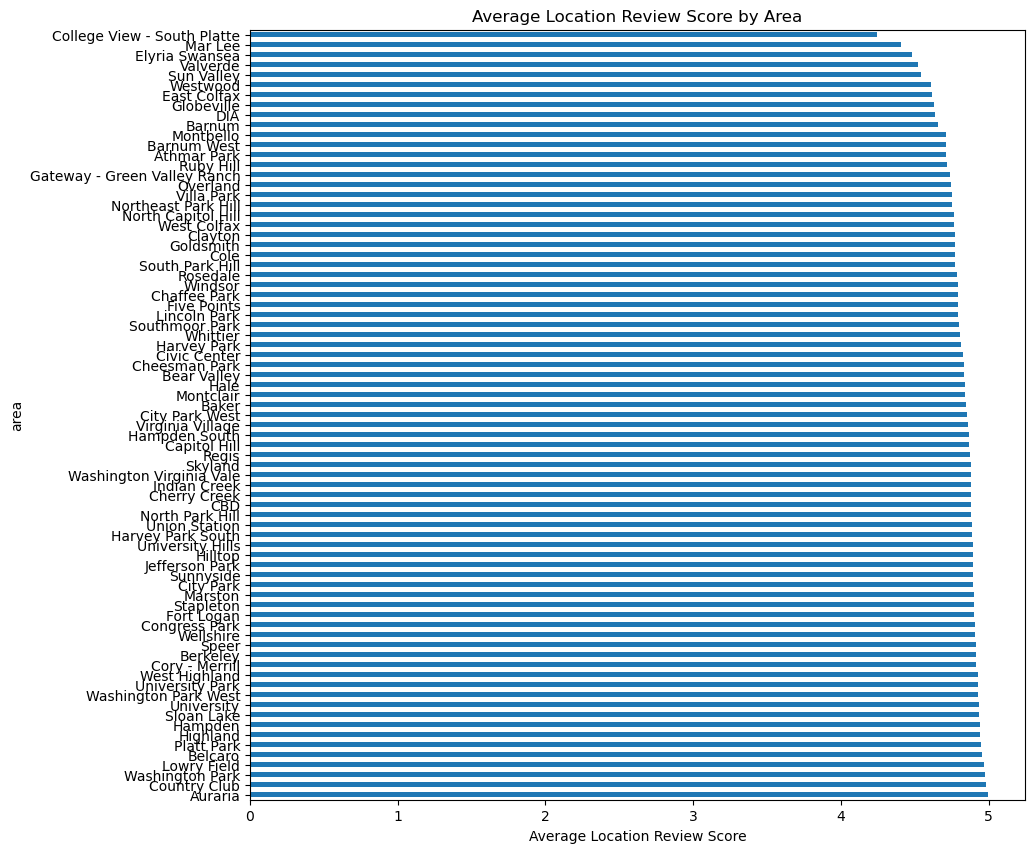

In [27]:
(review_scores_location_mean_area
    .sort_values(ascending=False)
    .plot(kind='barh', figsize=(10, 10), title='Average Location Review Score by Area'))
plt.xlabel('Average Location Review Score');

In [28]:
review_scores_rating_mean_area = airbnb_denver.groupby('area')['review_scores_rating'].mean()
review_scores_rating_mean_area.head()

area
Athmar Park    4.832766
Auraria        4.996667
Baker          4.815963
Barnum         4.769259
Barnum West    4.834545
Name: review_scores_rating, dtype: float64

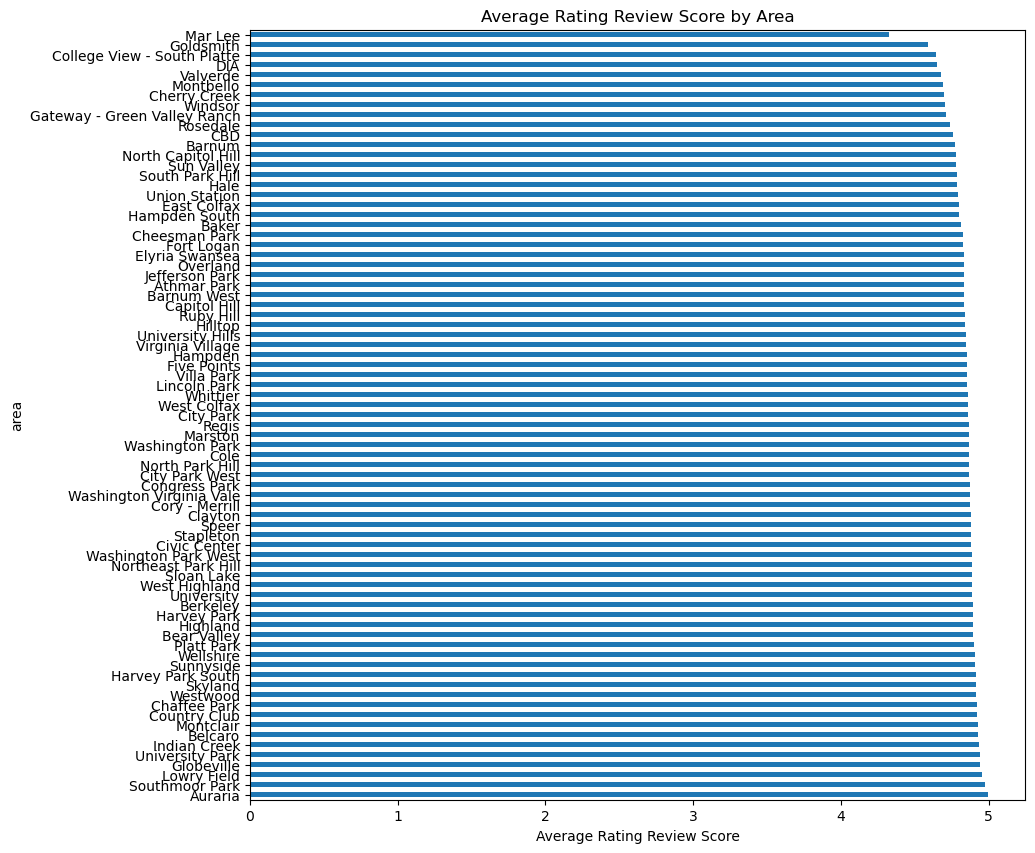

In [29]:
(review_scores_rating_mean_area
    .sort_values(ascending=False)
    .plot(kind='barh', figsize=(10, 10), title='Average Rating Review Score by Area'))
plt.xlabel('Average Rating Review Score');

Now I want to group avg review_scores_location and review_scores_rating by area

In [30]:
area_loc_rate_means = airbnb_denver.groupby('area')[['review_scores_location', 'review_scores_rating']].mean()
area_loc_rate_means.head()

,review_scores_location,review_scores_rating
area,,
Athmar Park,4.713191,4.832766
Auraria,4.996667,4.996667
Baker,4.846330,4.815963
Barnum,4.658148,4.769259
Barnum West,4.713182,4.834545


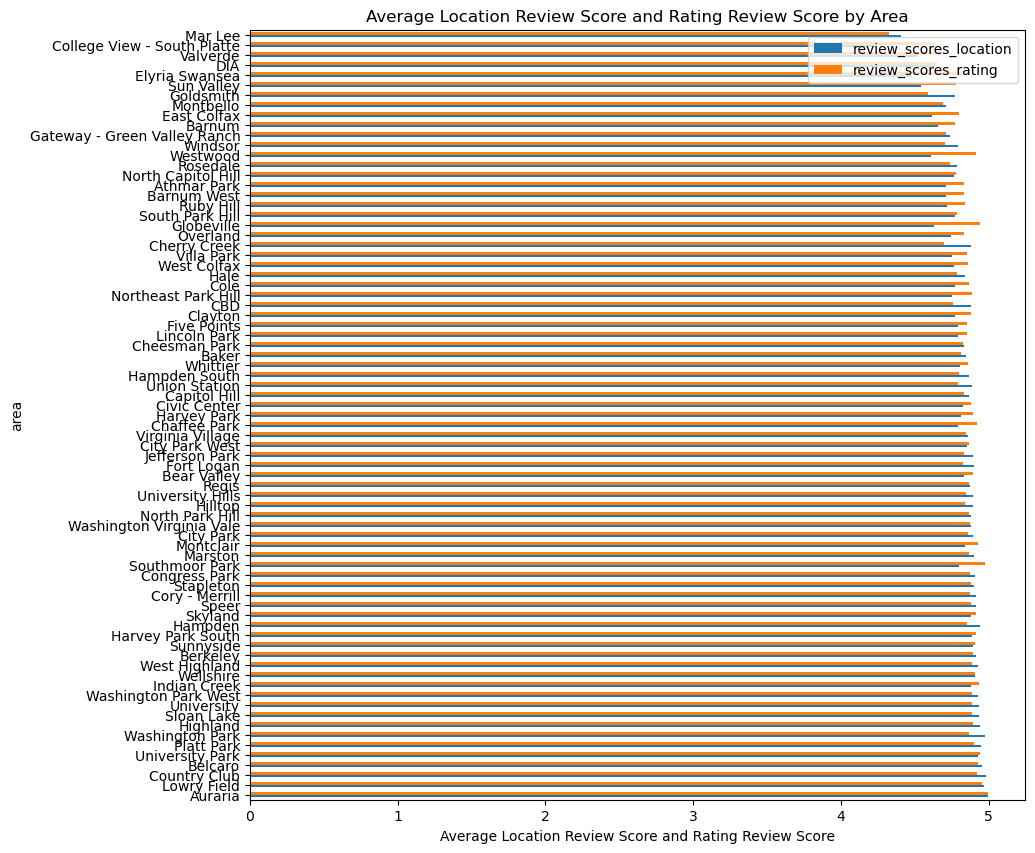

In [31]:
(area_loc_rate_means.reindex(index=(area_loc_rate_means).mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average Location Review Score and Rating Review Score by Area'))
plt.xlabel('Average Location Review Score and Rating Review Score');

##### 2.5.3.5.3 Distribution of review_score_location, review_score_rating by area<a id='2.5.3.5.3_Distribution_of_review_score_location_,_review_score_rating_and_price_by_area'></a>

In [32]:
review_scores_location_rating_area = pd.melt(airbnb_denver[['area', 'review_scores_location',
                                                                            'review_scores_rating']], 
                        id_vars='area', 
                        var_name='Review Score Location or Rating', 
                        value_vars=['review_scores_location', 'review_scores_rating'], 
                        value_name='Score')
review_scores_location_rating_area

,area,Review Score Location or Rating,Score
0,North Park Hill,review_scores_location,4.00
1,Hale,review_scores_location,NaN
2,Sloan Lake,review_scores_location,4.38
3,Five Points,review_scores_location,4.93
4,West Colfax,review_scores_location,NaN
...,...,...,...
9937,Capitol Hill,review_scores_rating,NaN
9938,Union Station,review_scores_rating,NaN
9939,Union Station,review_scores_rating,NaN
9940,Stapleton,review_scores_rating,5.00


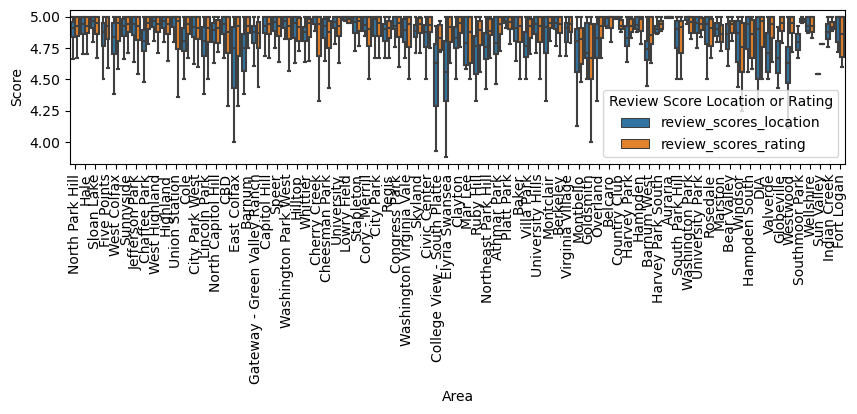

In [33]:
plt.subplots(figsize=(10, 2))
sns.boxplot(x='area', y='Score', hue='Review Score Location or Rating', showfliers=False,
            data=review_scores_location_rating_area)
plt.xticks(rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Area');

##### 2.5.3.5.4 Distribution of Price by Area<a id='2.5.3.5.4_Distribution_of_Price_by_Area'></a>

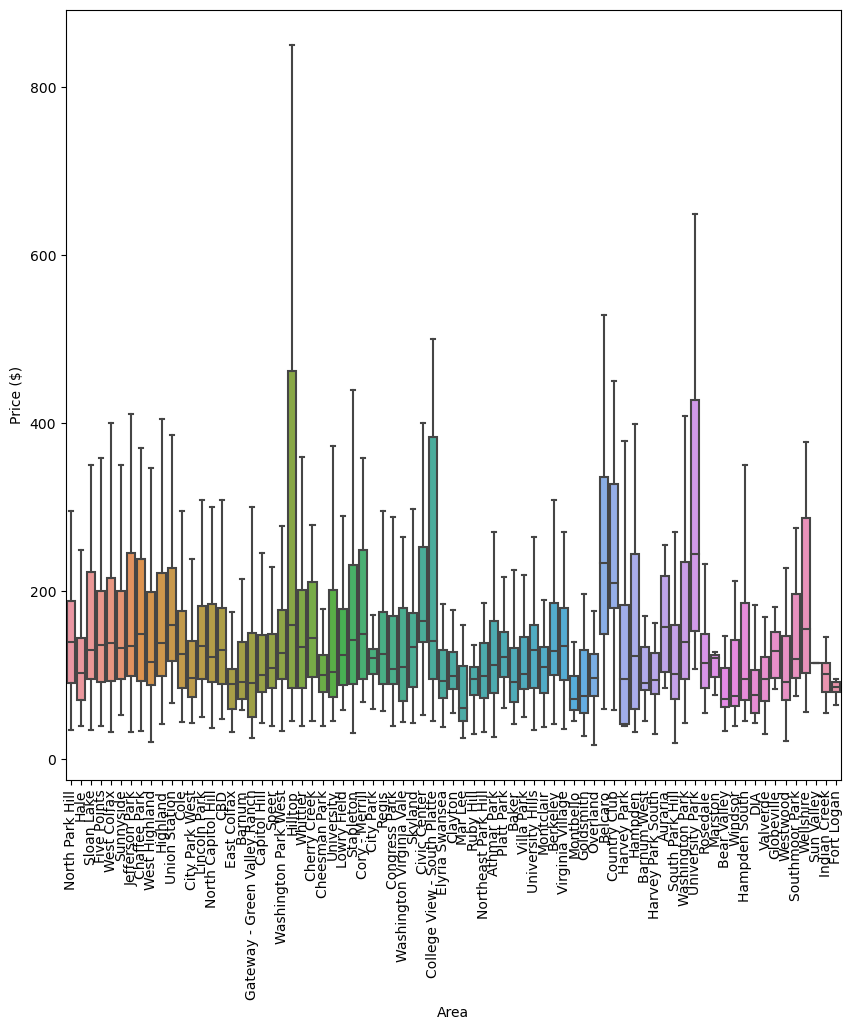

In [34]:
plt.subplots(figsize=(10, 10))
sns.boxplot(x='area', y='price', data=airbnb_denver, showfliers=False)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('Area');

##### 2.5.3.5.5 Distribution of Room Type by Area<a id='2.5.3.5.3_Distribution of room_type by area'></a>

Text(0.5, 0, 'Room Type')

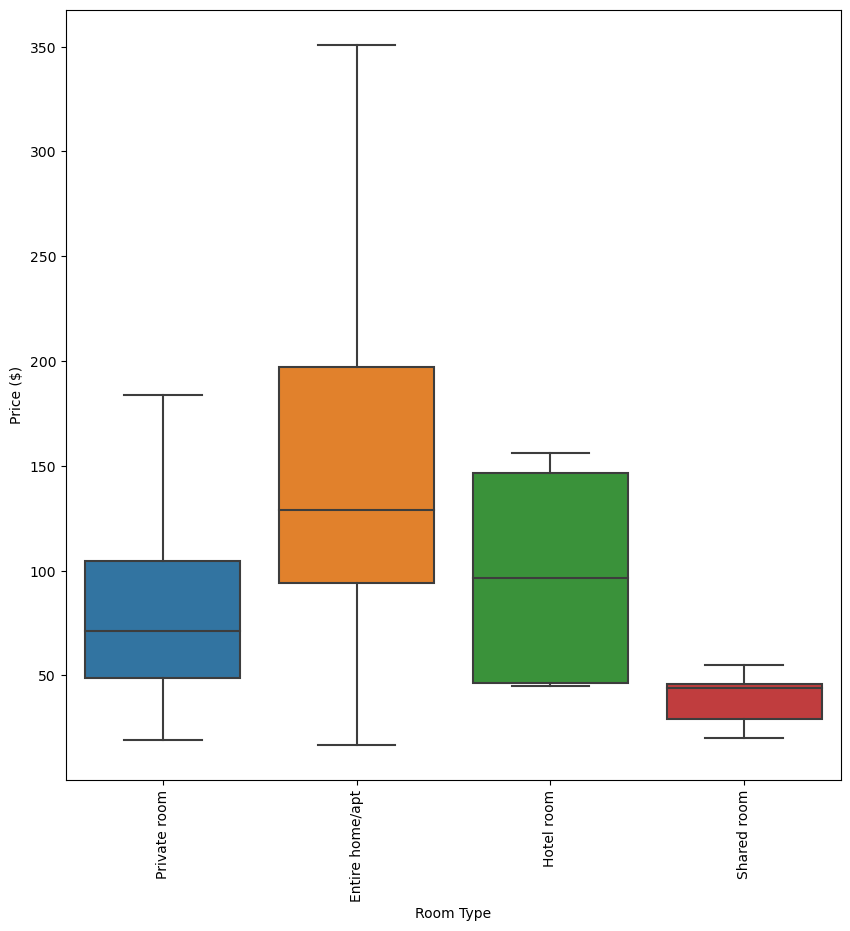

In [35]:
plt.subplots(figsize=(10, 10))
sns.boxplot(x='room_type', y='price', data=airbnb_denver, showfliers=False)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('Room Type')

### 2.5.4 Numeric Features<a id='2.5.4_Numeric_Features'></a>

#### 2.5.4.1 Numeric data summary<a id='2.5.4.1_Numeric_data_summary'></a>

In [36]:
airbnb_denver.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4971.0,4.099801e+17,4.210244e+17,360.000000,3.893798e+07,5.430000e+17,8.280000e+17,1.060000e+18
host_id,4971.0,1.543031e+08,1.647175e+08,589.000000,2.321258e+07,8.308022e+07,2.617749e+08,5.506749e+08
latitude,4971.0,3.974202e+01,3.140600e-02,39.625750,3.972740e+01,3.974828e+01,3.976252e+01,3.984742e+01
longitude,4971.0,-1.049771e+02,5.972287e-02,-105.095964,-1.050173e+02,-1.049850e+02,-1.049601e+02,-1.046738e+02
bedrooms,4906.0,2.219323e+00,1.577622e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
number_of_reviews,4971.0,5.965882e+01,1.064752e+02,0.000000,2.000000e+00,1.600000e+01,6.950000e+01,1.478000e+03
review_scores_rating,4215.0,4.844712e+00,3.414622e-01,1.000000,4.830000e+00,4.930000e+00,5.000000e+00,5.000000e+00
review_scores_accuracy,4215.0,4.864823e+00,3.192872e-01,1.000000,4.860000e+00,4.950000e+00,5.000000e+00,5.000000e+00
review_scores_cleanliness,4215.0,4.830567e+00,3.551164e-01,1.000000,4.805000e+00,4.930000e+00,5.000000e+00,5.000000e+00
review_scores_checkin,4215.0,4.897974e+00,3.068142e-01,1.000000,4.910000e+00,4.970000e+00,5.000000e+00,5.000000e+00


Recall I'm missing the prices for some 1.64% of area. This is a fundamental problem that means you simply lack the required data for those areas and will have to drop those records. But I want to keep any price you have.

In [37]:
missing_price = airbnb_denver[['price']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    98.350433
1     1.649567
dtype: float64

Just over 98% of areas have no missing ticket price. I will definitely want to drop the records for which you have no price information, however I will not do so just yet.

#### 2.5.4.2 Distributions Of Feature Values<a id='2.5.4.2_Distributions_Of_Feature_Values'></a>

Note that, although we are still in the 'data wrangling and cleaning' phase rather than exploratory data analysis, looking at distributions of features is immensely useful in getting a feel for whether the values look sensible and whether there are any obvious outliers to investigate. Some exploratory data analysis belongs here, and data wrangling will inevitably occur later on. It's more a matter of emphasis. Here, we're interesting in focusing on whether distributions look plausible or wrong. Later on, we're more interested in relationships and patterns.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'review_scores_rating'}>,
        <Axes: title={'center': 'review_scores_accuracy'}>],
       [<Axes: title={'center': 'review_scores_cleanliness'}>,
        <Axes: title={'center': 'review_scores_checkin'}>,
        <Axes: title={'center': 'review_scores_communication'}>,
        <Axes: title={'center': 'review_scores_location'}>],
       [<Axes: title={'center': 'review_scores_value'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

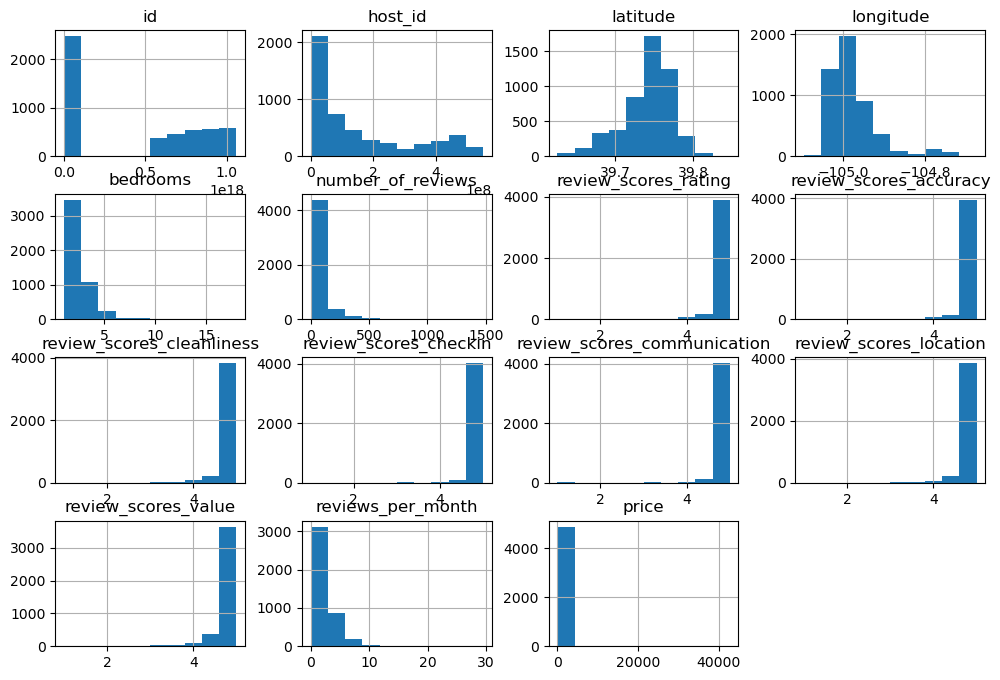

In [38]:
airbnb_denver.hist(figsize=(12,8))

##### 2.5.4.2.1 Reviews_per_month<a id='2.5.4.2.1_Reviews_per_month'></a>

In [39]:
airbnb_denver[airbnb_denver.reviews_per_month > 27]

,id,description,host_id,area,latitude,longitude,property_type,room_type,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price,home_type
1711,9.200000e+17,Rental unit in Denver · ★4.60 · Studio · 1 bed...,219524979,Highland,39.76346,-105.00993,Entire rental unit,Entire home/apt,1 bath,1.0,...,4.60,4.74,4.83,4.75,4.68,4.87,4.57,28.88,166.0,Rental
2941,8.690000e+17,Rental unit in Denver · ★4.78 · 1 bedroom · 2 ...,492297949,CBD,39.74208,-104.99287,Entire rental unit,Entire home/apt,1 bath,2.0,...,4.78,4.72,4.78,4.72,4.75,4.88,4.67,29.48,175.0,Rental


Two areas has the large reviews per month!

In [40]:
airbnb_denver[airbnb_denver.reviews_per_month > 27].T

,1711,2941
id,920000000000000000.0,869000000000000000.0
description,Rental unit in Denver · ★4.60 · Studio · 1 bed...,Rental unit in Denver · ★4.78 · 1 bedroom · 2 ...
host_id,219524979,492297949
area,Highland,CBD
latitude,39.76346,39.74208
longitude,-105.00993,-104.99287
property_type,Entire rental unit,Entire rental unit
room_type,Entire home/apt,Entire home/apt
bathrooms,1 bath,1 bath
bedrooms,1.0,2.0


The distribution of reviews_per_month

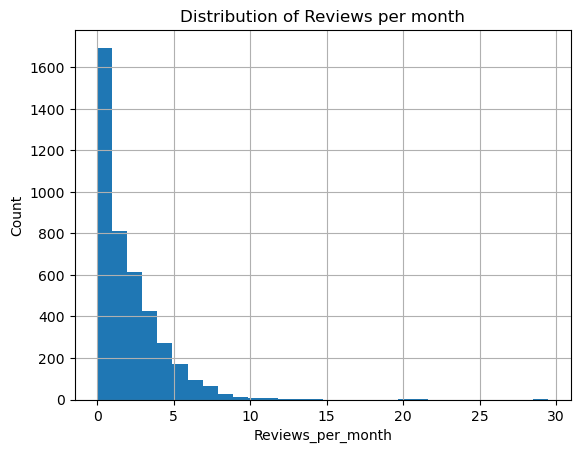

In [41]:
airbnb_denver.reviews_per_month.hist(bins=30)
plt.xlabel('Reviews_per_month')
plt.ylabel('Count')
plt.title('Distribution of Reviews per month');

##### 2.5.4.2.2 Price<a id='2.5.4.2.2_Price'></a>

In [42]:
airbnb_denver[airbnb_denver['price'] > 40000]

,id,description,host_id,area,latitude,longitude,property_type,room_type,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price,home_type
550,2.171266e+07,Condo in Denver · ★4.71 · 2 bedrooms · 2 beds ...,9691307,Cheesman Park,39.735868,-104.972721,Entire condo,Entire home/apt,1 bath,2.0,...,4.71,4.81,4.62,5.00,4.90,4.95,4.62,0.37,42635.0,Condo
2607,1.020000e+18,Rental unit in Denver · ★5.0 · 1 bedroom · 1 b...,9691307,Speer,39.727090,-104.979081,Entire rental unit,Entire home/apt,1 bath,1.0,...,5.00,5.00,5.00,4.67,5.00,5.00,5.00,2.65,42770.0,Rental
2877,4.572028e+07,Home in Denver · ★4.74 · 3 bedrooms · 5 beds ·...,9691307,West Highland,39.761960,-105.049020,Entire home,Entire home/apt,1 bath,5.0,...,4.74,4.86,4.83,4.90,4.82,4.92,4.60,2.23,42660.0,Home
2952,6.330000e+17,Townhouse in Denver · ★4.93 · 4 bedrooms · 4 b...,9691307,Highland,39.768390,-105.012200,Entire townhouse,Entire home/apt,3.5 baths,4.0,...,4.93,4.88,5.00,4.95,4.95,4.86,4.80,2.83,42611.0,Townhouse


In [43]:
airbnb_denver[airbnb_denver['price'] > 40000].T

,550,2607,2877,2952
id,21712656.0,1020000000000000000.0,45720276.0,633000000000000000.0
description,Condo in Denver · ★4.71 · 2 bedrooms · 2 beds ...,Rental unit in Denver · ★5.0 · 1 bedroom · 1 b...,Home in Denver · ★4.74 · 3 bedrooms · 5 beds ·...,Townhouse in Denver · ★4.93 · 4 bedrooms · 4 b...
host_id,9691307,9691307,9691307,9691307
area,Cheesman Park,Speer,West Highland,Highland
latitude,39.735868,39.72709,39.76196,39.76839
longitude,-104.972721,-104.979081,-105.04902,-105.0122
property_type,Entire condo,Entire rental unit,Entire home,Entire townhouse
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
bathrooms,1 bath,1 bath,1 bath,3.5 baths
bedrooms,2.0,1.0,5.0,4.0


##### 2.5.4.2.3 Review scores (review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value)<a id='2.5.4.2.3_Review_scores_(review_scores_rating_,_review_scores_accuracy_,_review_scores_cleanliness_,_review_scores_checkin_,_review_scores_communication_,_review_scores_location_,_review_scores_value)'></a>

Look at the different review scores values more closely:

In [44]:
airbnb_denver.review_scores_rating.value_counts()

5.00    1317
4.97     163
4.94     144
4.95     142
4.92     141
        ... 
4.35       1
4.22       1
4.06       1
4.14       1
3.91       1
Name: review_scores_rating, Length: 95, dtype: int64

##### 2.5.4.2.4 Bedrooms and Bathrooms<a id='2.5.4.2.4_Bedrooms_and_Bathrooms'></a>

Bedrooms :

In [45]:
airbnb_denver.bedrooms.value_counts()

1.0     1932
2.0     1531
3.0      730
4.0      347
5.0      180
6.0       76
7.0       41
8.0       27
10.0      14
9.0       14
11.0       4
14.0       3
12.0       2
17.0       2
13.0       1
18.0       1
16.0       1
Name: bedrooms, dtype: int64

Bathrooms:

Here I have two issues.

1.Half-bath has the different format.
2.I change all values of the columns to numeric type

In [46]:
airbnb_denver.bathrooms.unique()

array(['1 shared bath', '2 baths', '2.5 baths', '1 bath', '4 baths',
       '3.5 baths', '1 private bath', '1.5 baths', '3 baths',
       '2 shared baths', '4.5 baths', '6 baths', '5 baths', '7.5 baths',
       '1.5 shared baths', '5.5 baths', '3 shared baths',
       '4 shared baths', '17 shared baths', '2.5 shared baths',
       '6.5 baths', '0 baths', 'Half-bath', nan], dtype=object)

In [47]:
airbnb_denver['bathrooms'] = airbnb_denver['bathrooms'].str.split().str.get(0)
airbnb_denver.loc[airbnb_denver["bathrooms"] == "Half-bath", "bathrooms"] = 0.5
airbnb_denver['bathrooms'] = airbnb_denver['bathrooms'].astype(float)

In [48]:
airbnb_denver.bathrooms.unique()

array([ 1. ,  2. ,  2.5,  4. ,  3.5,  1.5,  3. ,  4.5,  6. ,  5. ,  7.5,
        5.5, 17. ,  6.5,  0. ,  0.5,  nan])

## 2.6 Derive Area-wide Summary Statistics In Distinct Area<a id='2.6_Derive_Area-wide_Summary_Statistics_In_Distinct_Area'></a>

I want to add any features to my data that I capture the area-wide market size. In the next section, I'll drop rows with missing price information.

In [49]:
airbnb_denver['area'].value_counts()

Five Points       415
Highland          298
West Colfax       226
Union Station     198
Berkeley          168
                 ... 
Fort Logan          7
Auraria             4
Marston             3
Southmoor Park      3
Sun Valley          1
Name: area, Length: 77, dtype: int64

In [50]:
denver_summary = airbnb_denver.groupby('area').agg(
    area_id_number=pd.NamedAgg(column='id', aggfunc='size'),
    area_mean_review_scores_rating=pd.NamedAgg(column='review_scores_rating', aggfunc='mean'),
    area_mean_review_scores_location=pd.NamedAgg(column='review_scores_location', aggfunc='mean'),
    area_mean_bedrooms=pd.NamedAgg(column='bedrooms', aggfunc='mean'),
    area_sum_number_of_reviews=pd.NamedAgg(column='number_of_reviews', aggfunc='sum'),
    area_mean_price=pd.NamedAgg(column='price', aggfunc='mean')
).reset_index()
denver_summary.head()

,area,area_id_number,area_mean_review_scores_rating,area_mean_review_scores_location,area_mean_bedrooms,area_sum_number_of_reviews,area_mean_price
0,Athmar Park,55,4.832766,4.713191,2.444444,1952,142.472727
1,Auraria,4,4.996667,4.996667,1.750000,90,163.750000
2,Baker,118,4.815963,4.846330,1.846154,6018,122.119658
3,Barnum,34,4.769259,4.658148,2.176471,1043,121.264706
4,Barnum West,26,4.834545,4.713182,2.115385,1330,115.230769


## 2.7 Drop Rows With No Price Data<a id='2.7_Drop_Rows_With_No_Price_Data'></a>

I calculate the number of price values missing per row.

In [51]:
missing_price = airbnb_denver[['price']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    98.350433
1     1.649567
dtype: float64

In [52]:
missing_price.value_counts()

0    4889
1      82
dtype: int64

About 1.64% of the rows have no price data. As the price is your target, these rows are of no use. Time to lose them.

In [53]:
airbnb_denver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4971 entries, 0 to 4970
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4971 non-null   float64
 1   description                  4971 non-null   object 
 2   host_id                      4971 non-null   int64  
 3   area                         4971 non-null   object 
 4   latitude                     4971 non-null   float64
 5   longitude                    4971 non-null   float64
 6   property_type                4971 non-null   object 
 7   room_type                    4971 non-null   object 
 8   bathrooms                    4969 non-null   float64
 9   bedrooms                     4906 non-null   float64
 10  number_of_reviews            4971 non-null   int64  
 11  last_scraped                 4971 non-null   object 
 12  review_scores_rating         4215 non-null   float64
 13  review_scores_accu

In [54]:
airbnb_denver = airbnb_denver[missing_price != 1]
airbnb_denver

,id,description,host_id,area,latitude,longitude,property_type,room_type,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price,home_type
0,6.070000e+17,Home in Denver · 1 bedroom · 1 bed · 1 shared ...,430149575,North Park Hill,39.760390,-104.92968,Private room in home,Private room,1.0,1.0,...,3.00,2.50,2.50,3.00,3.50,4.00,3.00,0.11,35.0,Home
1,5.460000e+17,Rental unit in Denver · 2 bedrooms · 3 beds · ...,169214047,Hale,39.727850,-104.93783,Entire rental unit,Entire home/apt,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,Rental
3,5.242953e+07,Townhouse in Denver · ★4.78 · 3 bedrooms · 4 b...,107279139,Five Points,39.758520,-104.98846,Entire townhouse,Entire home/apt,2.5,4.0,...,4.78,4.88,4.62,4.78,4.78,4.93,4.59,2.52,190.0,Townhouse
4,6.320000e+17,Townhouse in Denver · ★New · 2 bedrooms · 2 be...,416194740,West Colfax,39.736019,-105.05072,Entire townhouse,Entire home/apt,2.5,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,Townhouse
5,6.880000e+17,Home in Denver · ★5.0 · 2 bedrooms · 2 beds · ...,133612752,Sunnyside,39.771430,-105.02028,Entire home,Entire home/apt,1.0,2.0,...,5.00,5.00,5.00,5.00,5.00,4.92,4.92,0.99,300.0,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,6.800000e+17,Home in Denver · ★5.0 · 2 bedrooms · 2 beds · ...,111759392,Sunnyside,39.774110,-105.01761,Entire home,Entire home/apt,1.0,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.40,78.0,Home
4967,6.300000e+17,Condo in Denver · 2 bedrooms · 2 beds · 1 bath,81155589,Union Station,39.752110,-104.99469,Entire condo,Entire home/apt,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.0,Condo
4968,4.727457e+07,Condo in Denver · 2 bedrooms · 2 beds · 2 baths,381236017,Union Station,39.752320,-105.00347,Entire condo,Entire home/apt,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,Condo
4969,9.680000e+17,Guesthouse in Denver · ★5.0 · 1 bedroom · 1 be...,72729519,Stapleton,39.803850,-104.87780,Entire guesthouse,Entire home/apt,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.05,135.0,Guesthouse


In [55]:
missing_price = airbnb_denver[['price']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    100.0
dtype: float64

## 2.8 Review Summary Distribution<a id='2.8_Review_Summary_Distribution'></a>

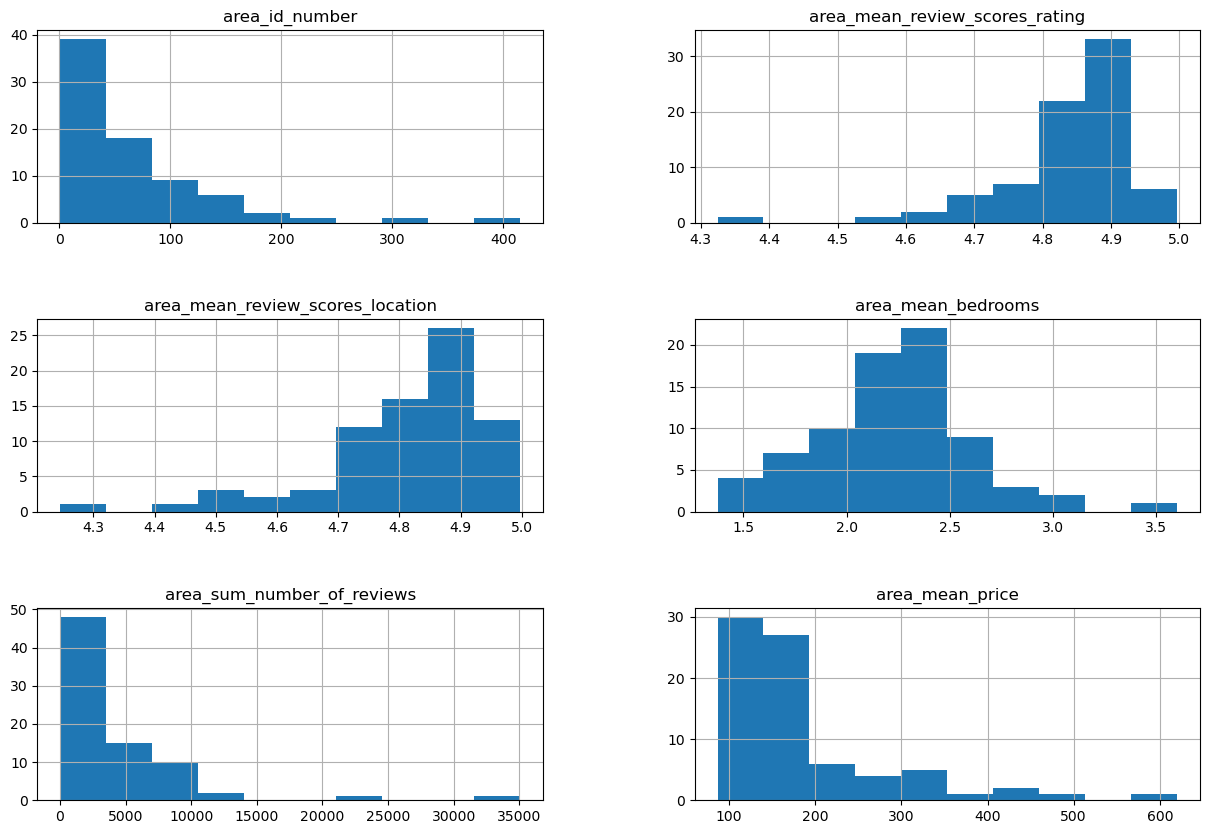

In [56]:
denver_summary.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

In [57]:
denver_summary.isna().sum()

area                                0
area_id_number                      0
area_mean_review_scores_rating      0
area_mean_review_scores_location    0
area_mean_bedrooms                  0
area_sum_number_of_reviews          0
area_mean_price                     0
dtype: int64

This table give me the good insight about the summary of data

## 2.9 Add Area Population and Region Area to Summary<a id='2.9_Add_Area_Population_Region Area_to_Summary'></a>

Population and area data for the US Colorado can be obtained from [wikipedia](https://simple.wikipedia.org/wiki/List_of_counties_in_Colorado). I should have a healthy concern about using data I "found on the Internet". Make sure it comes from a reputable source. This table of data is useful because it allows me to easily pull and incorporate an external data set. It also allows me to proceed with an analysis that includes area sizes and populations for your 'first cut' model. All steps are subject to review, and it may be that a client has a specific source of data they trust that I should use to rerun the analysis.

In [58]:
Wiki_denver = pd.read_csv('denver-colorado-census-neighborhood-demographics-2010.csv')
Wiki_denver.head()

,WKT,NBHD_ID,NBRHD_NAME,POPULATION_2010,HISPANIC_2010,WHITE_2010,BLACK_2010,NATIVEAM_2010,ASIAN_2010,HAWPACIS_2010,...,RENTED_AGE_15_TO_24,RENTED_AGE_25_TO_34,RENTED_AGE_35_TO_44,RENTED_AGE_45_TO_54,RENTED_AGE_55_TO_59,RENTED_AGE_60_TO_64,RENTED_AGE_65_TO_74,RENTED_AGE_75_TO_84,RENTED_AGE_85_PLUS,SHAPE_Length
0,"POLYGON ((-104.973383173 39.7437795340001,-104...",47,North Capitol Hill,5823,650,4283,536,41,148,3,...,550,1368,387,325,169,157,181,86,22,0.040371
1,"POLYGON ((-104.998203287 39.7692973040001,-104...",36,Highland,8429,3140,4840,161,54,115,10,...,230,926,412,256,91,70,80,91,129,0.076194
2,"POLYGON ((-104.940696654 39.6954045050001,-104...",21,Cory - Merrill,3892,238,3440,38,6,104,1,...,35,153,81,51,24,18,10,7,6,0.063099
3,"POLYGON ((-105.025175679 39.7365818070001,-105...",74,West Colfax,9740,6025,2875,385,138,154,7,...,293,652,501,436,160,166,297,176,65,0.080874
4,"POLYGON ((-105.025059103 39.6967472810001,-105...",43,Mar Lee,12452,8571,3015,176,81,449,6,...,125,480,378,261,93,58,64,32,7,0.085462


In [59]:
type(Wiki_denver)

pandas.core.frame.DataFrame

In [60]:
len(Wiki_denver)

78

Extract the state denver area and population area.

In [61]:
Wiki_denver_sub = Wiki_denver.iloc[:, [2, 3]].copy()
Wiki_denver_sub.columns = ['area', 'population']
Wiki_denver_sub.head()

,area,population
0,North Capitol Hill,5823
1,Highland,8429
2,Cory - Merrill,3892
3,West Colfax,9740
4,Mar Lee,12452


Do you have all airbnb data denver neighborhoods accounted for?

In [62]:
denver_summary

,area,area_id_number,area_mean_review_scores_rating,area_mean_review_scores_location,area_mean_bedrooms,area_sum_number_of_reviews,area_mean_price
0,Athmar Park,55,4.832766,4.713191,2.444444,1952,142.472727
1,Auraria,4,4.996667,4.996667,1.750000,90,163.750000
2,Baker,118,4.815963,4.846330,1.846154,6018,122.119658
3,Barnum,34,4.769259,4.658148,2.176471,1043,121.264706
4,Barnum West,26,4.834545,4.713182,2.115385,1330,115.230769
...,...,...,...,...,...,...,...
72,West Colfax,226,4.858316,4.765789,2.542222,9803,196.633028
73,West Highland,147,4.889687,4.924922,2.262069,10459,465.826087
74,Westwood,32,4.914783,4.609565,2.312500,900,116.062500
75,Whittier,92,4.858182,4.804545,2.359551,9919,179.322222


In [63]:
denver_summary['area'].nunique() 

77

I know the denver_summary has 77 rows, but Wiki_denver has 78. I try to edit it

In [64]:
missing_area = set(denver_summary.area) - set(Wiki_denver_sub.area)
missing_area

{'College View - South Platte', 'Gateway - Green Valley Ranch'}

In [65]:
len(missing_area)

2

If you look at the table on the web, you can perhaps start to guess what the problem is. You can confirm your suspicion by pulling out state names that _contain_ 'College View - South Platte', 'Gateway - Green Valley Ranch' from denver_neighborhoods_sub:

In [66]:
denver_summary['area'].unique()

array(['Athmar Park', 'Auraria', 'Baker', 'Barnum', 'Barnum West',
       'Bear Valley', 'Belcaro', 'Berkeley', 'CBD', 'Capitol Hill',
       'Chaffee Park', 'Cheesman Park', 'Cherry Creek', 'City Park',
       'City Park West', 'Civic Center', 'Clayton', 'Cole',
       'College View - South Platte', 'Congress Park', 'Cory - Merrill',
       'Country Club', 'DIA', 'East Colfax', 'Elyria Swansea',
       'Five Points', 'Fort Logan', 'Gateway - Green Valley Ranch',
       'Globeville', 'Goldsmith', 'Hale', 'Hampden', 'Hampden South',
       'Harvey Park', 'Harvey Park South', 'Highland', 'Hilltop',
       'Indian Creek', 'Jefferson Park', 'Lincoln Park', 'Lowry Field',
       'Mar Lee', 'Marston', 'Montbello', 'Montclair',
       'North Capitol Hill', 'North Park Hill', 'Northeast Park Hill',
       'Overland', 'Platt Park', 'Regis', 'Rosedale', 'Ruby Hill',
       'Skyland', 'Sloan Lake', 'South Park Hill', 'Southmoor Park',
       'Speer', 'Stapleton', 'Sun Valley', 'Sunnyside', 'Union

In [67]:
Wiki_denver_sub['area'].unique()

array(['North Capitol Hill', 'Highland', 'Cory - Merrill', 'West Colfax',
       'Mar Lee', 'Hale', 'Cheesman Park', 'Whittier', 'East Colfax',
       'Hampden', 'Barnum West', 'Clayton', 'Rosedale', 'Baker',
       'Skyland', 'Washington Park', 'City Park West', 'Capitol Hill',
       'Cherry Creek', 'Country Club', 'Civic Center', 'CBD',
       'Southmoor Park', 'Union Station', 'Five Points', 'Stapleton',
       'Globeville', 'University Park', 'Washington Park West', 'Speer',
       'Indian Creek', 'DIA', 'Congress Park', 'Cole', 'Sunnyside',
       'Ruby Hill', 'University', 'Goldsmith', 'Virginia Village',
       'University Hills', 'West Highland', 'City Park', 'Lowry Field',
       'Harvey Park South', 'Gateway / Green Valley Ranch', 'Montclair',
       'Platt Park', 'Westwood', 'North Park Hill', 'South Park Hill',
       'Kennedy', 'Northeast Park Hill', 'Washington Virginia Vale',
       'Villa Park', 'College View / South Platte', 'Hampden South',
       'Sloan Lake', 'Elyr

When I notice to data, I try to join 'College View - South Platte' and 'Gateway - Green Valley Ranch' to each other in denver_summary.

In [68]:
denver_summary.loc[denver_summary['area'] == 'College View - South Platte']

,area,area_id_number,area_mean_review_scores_rating,area_mean_review_scores_location,area_mean_bedrooms,area_sum_number_of_reviews,area_mean_price
18,College View - South Platte,15,4.646364,4.246364,2.733333,555,228.266667


In [69]:
denver_summary.loc[denver_summary['area'] == 'Gateway - Green Valley Ranch']

,area,area_id_number,area_mean_review_scores_rating,area_mean_review_scores_location,area_mean_bedrooms,area_sum_number_of_reviews,area_mean_price
27,Gateway - Green Valley Ranch,162,4.711418,4.740142,2.525,9891,113.43125


I want to add new row as 'Gateway / Green Valley Ranch' instead of those two rows. I decide to give the mean of them.

In [70]:
denver_summary.shape

(77, 7)

In [71]:
new_row = {'area': 'Gateway / Green Valley Ranch', 'area_id_number': 177,
           'area_mean_review_scores_rating': (4.646364+4.711418)/2,
           'area_mean_review_scores_location': (4.246364+4.740142)/2,
           'area_mean_bedrooms': (2.733333+2.525)/2,
           'area_sum_number_of_reviews':  9891+555, 'area_mean_price' : (228.266667+113.43125)/2
          }

In [72]:
denver_summary.loc[len(denver_summary)] = new_row

In [73]:
denver_summary = denver_summary.append(new_row, ignore_index=True)

C:\Users\sepeh\AppData\Local\Temp\ipykernel_29112\3865691111.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  denver_summary = denver_summary.append(new_row, ignore_index=True)


In [74]:
print(denver_summary.tail(1))

                            area  area_id_number  \
78  Gateway / Green Valley Ranch             177   

    area_mean_review_scores_rating  area_mean_review_scores_location  \
78                        4.678891                          4.493253   

    area_mean_bedrooms  area_sum_number_of_reviews  area_mean_price  
78            2.629167                       10446       170.848959  


In [75]:
denver_summary['area'].unique()

array(['Athmar Park', 'Auraria', 'Baker', 'Barnum', 'Barnum West',
       'Bear Valley', 'Belcaro', 'Berkeley', 'CBD', 'Capitol Hill',
       'Chaffee Park', 'Cheesman Park', 'Cherry Creek', 'City Park',
       'City Park West', 'Civic Center', 'Clayton', 'Cole',
       'College View - South Platte', 'Congress Park', 'Cory - Merrill',
       'Country Club', 'DIA', 'East Colfax', 'Elyria Swansea',
       'Five Points', 'Fort Logan', 'Gateway - Green Valley Ranch',
       'Globeville', 'Goldsmith', 'Hale', 'Hampden', 'Hampden South',
       'Harvey Park', 'Harvey Park South', 'Highland', 'Hilltop',
       'Indian Creek', 'Jefferson Park', 'Lincoln Park', 'Lowry Field',
       'Mar Lee', 'Marston', 'Montbello', 'Montclair',
       'North Capitol Hill', 'North Park Hill', 'Northeast Park Hill',
       'Overland', 'Platt Park', 'Regis', 'Rosedale', 'Ruby Hill',
       'Skyland', 'Sloan Lake', 'South Park Hill', 'Southmoor Park',
       'Speer', 'Stapleton', 'Sun Valley', 'Sunnyside', 'Union

It's time to remove those rows. They are in 18 and 27 rows.

In [76]:
denver_summary = denver_summary.drop(labels=18, axis=0)
denver_summary = denver_summary.drop(labels=27, axis=0)

In [77]:
denver_summary['area'].unique()

array(['Athmar Park', 'Auraria', 'Baker', 'Barnum', 'Barnum West',
       'Bear Valley', 'Belcaro', 'Berkeley', 'CBD', 'Capitol Hill',
       'Chaffee Park', 'Cheesman Park', 'Cherry Creek', 'City Park',
       'City Park West', 'Civic Center', 'Clayton', 'Cole',
       'Congress Park', 'Cory - Merrill', 'Country Club', 'DIA',
       'East Colfax', 'Elyria Swansea', 'Five Points', 'Fort Logan',
       'Globeville', 'Goldsmith', 'Hale', 'Hampden', 'Hampden South',
       'Harvey Park', 'Harvey Park South', 'Highland', 'Hilltop',
       'Indian Creek', 'Jefferson Park', 'Lincoln Park', 'Lowry Field',
       'Mar Lee', 'Marston', 'Montbello', 'Montclair',
       'North Capitol Hill', 'North Park Hill', 'Northeast Park Hill',
       'Overland', 'Platt Park', 'Regis', 'Rosedale', 'Ruby Hill',
       'Skyland', 'Sloan Lake', 'South Park Hill', 'Southmoor Park',
       'Speer', 'Stapleton', 'Sun Valley', 'Sunnyside', 'Union Station',
       'University', 'University Hills', 'University Park',

In [78]:
Wiki_denver_sub.head()

,area,population
0,North Capitol Hill,5823
1,Highland,8429
2,Cory - Merrill,3892
3,West Colfax,9740
4,Mar Lee,12452


Now I check the data. The set should be empty

In [79]:
missing_area = set(denver_summary.area) - set(Wiki_denver_sub.area)
missing_area

set()

Now I add the population column to the denver summary

In [80]:
denver_summary = denver_summary.merge(Wiki_denver_sub, how='left', on='area')
denver_summary.head()

,area,area_id_number,area_mean_review_scores_rating,area_mean_review_scores_location,area_mean_bedrooms,area_sum_number_of_reviews,area_mean_price,population
0,Athmar Park,55,4.832766,4.713191,2.444444,1952,142.472727,8898
1,Auraria,4,4.996667,4.996667,1.750000,90,163.750000,705
2,Baker,118,4.815963,4.846330,1.846154,6018,122.119658,4879
3,Barnum,34,4.769259,4.658148,2.176471,1043,121.264706,6111
4,Barnum West,26,4.834545,4.713182,2.115385,1330,115.230769,5376


I want to add the area_sq_miles column.

Athmar Park: 1.53 sq miles
Auraria: 0.32 sq miles
Baker: 1.26 sq miles
Barnum: 1.47 sq miles
Barnum West: 0.74 sq miles
Bear Valley: 3.55 sq miles
Belcaro: 1.19 sq miles
Berkeley: 1.99 sq miles
CBD (Central Business District): 1.56 sq miles
Capitol Hill: 1.18 sq miles
Chaffee Park: 0.87 sq miles
Cheesman Park: 0.52 sq miles
Cherry Creek: 1.61 sq miles
City Park: 1.43 sq miles
City Park West: 0.59 sq miles
Civic Center: 0.08 sq miles
Clayton: 1.17 sq miles
Cole: 1.26 sq miles
Congress Park: 0.93 sq miles
Cory - Merrill: 0.83 sq miles
Country Club: 0.38 sq miles
DIA (Denver International Airport): DIA 53

East Colfax: 1.63 sq miles
Elyria Swansea: 2.03 sq miles
Five Points: 0.96 sq miles
Fort Logan: 1.72 sq miles
Globeville: 1.44 sq miles
Goldsmith: 0.87 sq miles
Hale: 0.73 sq miles
Hampden: 4.60 sq miles
Hampden South: 3.73 sq miles
Harvey Park: 1.69 sq miles
Harvey Park South: 1.24 sq miles
Highland: 1.93 sq miles
Hilltop: 1.07 sq miles
Indian Creek, 1.12

Jefferson Park, 0.45
Lincoln Park, 0.49
Lowry Field, 1.35
Mar Lee, 1.59
Marston, 3.23
Montbello, 4.42
Montclair, 2.58
North Capitol Hill, 0.63
North Park Hill, 1.52
Northeast Park Hill, 2.10
Overland, 1.53
Platt Park, 0.82
Regis, 1.04
Rosedale, 0.59
Ruby Hill, 1.76
Skyland, 1.07
Sloan Lake, 0.74
South Park Hill, 1.36
Southmoor Park, 1.84
Speer, 1.11
Stapleton, 4.46
Sun Valley, 1.19
Sunnyside, 1.32
Union Station, 0.2

University, 1.95
University Hills, 1.96
University Park, 1.62
Valverde, 0.74
Villa Park, 1.93
Virginia Village, 2.67
Washington Park, 1.13
Washington Park West, 0.64
Washington Virginia Vale, 2.70
Wellshire, 1.32
West Colfax, 1.22
West Highland, 0.88
Westwood, 3.23
Whittier, 0.56
Windsor, 0.52
Gateway / Green Valley Ranch, 19.66

In [81]:
denver_summary['area'].unique()

array(['Athmar Park', 'Auraria', 'Baker', 'Barnum', 'Barnum West',
       'Bear Valley', 'Belcaro', 'Berkeley', 'CBD', 'Capitol Hill',
       'Chaffee Park', 'Cheesman Park', 'Cherry Creek', 'City Park',
       'City Park West', 'Civic Center', 'Clayton', 'Cole',
       'Congress Park', 'Cory - Merrill', 'Country Club', 'DIA',
       'East Colfax', 'Elyria Swansea', 'Five Points', 'Fort Logan',
       'Globeville', 'Goldsmith', 'Hale', 'Hampden', 'Hampden South',
       'Harvey Park', 'Harvey Park South', 'Highland', 'Hilltop',
       'Indian Creek', 'Jefferson Park', 'Lincoln Park', 'Lowry Field',
       'Mar Lee', 'Marston', 'Montbello', 'Montclair',
       'North Capitol Hill', 'North Park Hill', 'Northeast Park Hill',
       'Overland', 'Platt Park', 'Regis', 'Rosedale', 'Ruby Hill',
       'Skyland', 'Sloan Lake', 'South Park Hill', 'Southmoor Park',
       'Speer', 'Stapleton', 'Sun Valley', 'Sunnyside', 'Union Station',
       'University', 'University Hills', 'University Park',

In [82]:
denver_summary.loc[:, 'region_area_sq_miles'] = [1.53, 0.32, 1.26, 1.47, 0.74, 3.55, 1.19, 1.99, 1.56, 1.18, 0.87, 0.52, 1.61, 1.43, 0.59, 0.08, 1.17, 1.26, 0.93, 0.83, 0.38, 53, 1.63, 2.03, 0.96, 1.72, 1.44, 0.87, 0.73, 4.6, 3.73, 1.69, 1.24, 1.93, 1.07, 1.12, 0.45, 0.49, 1.35, 1.59, 3.23, 4.42, 2.58, 0.63, 1.52, 2.10, 1.53, 0.82, 1.04, 0.59, 1.76, 1.07, 0.74, 1.36, 1.84, 1.11, 4.46, 1.19, 1.32, 0.2, 1.95, 1.96, 1.62, 0.74, 1.93, 2.67, 1.13, 0.64, 2.70, 1.32, 1.22, 0.88, 3.23, 0.56, 0.52, 19.66, 19.66]

In [83]:
denver_summary

,area,area_id_number,area_mean_review_scores_rating,area_mean_review_scores_location,area_mean_bedrooms,area_sum_number_of_reviews,area_mean_price,population,region_area_sq_miles
0,Athmar Park,55,4.832766,4.713191,2.444444,1952,142.472727,8898,1.53
1,Auraria,4,4.996667,4.996667,1.750000,90,163.750000,705,0.32
2,Baker,118,4.815963,4.846330,1.846154,6018,122.119658,4879,1.26
3,Barnum,34,4.769259,4.658148,2.176471,1043,121.264706,6111,1.47
4,Barnum West,26,4.834545,4.713182,2.115385,1330,115.230769,5376,0.74
...,...,...,...,...,...,...,...,...,...
72,Westwood,32,4.914783,4.609565,2.312500,900,116.062500,15486,3.23
73,Whittier,92,4.858182,4.804545,2.359551,9919,179.322222,4831,0.56
74,Windsor,16,4.702727,4.790909,2.875000,293,142.750000,12589,0.52
75,Gateway / Green Valley Ranch,177,4.678891,4.493253,2.629167,10446,170.848959,29201,19.66


I should delete the last row, because it's duplicated.

In [84]:
denver_summary = denver_summary.drop(labels=76, axis=0)

In [85]:
denver_summary

,area,area_id_number,area_mean_review_scores_rating,area_mean_review_scores_location,area_mean_bedrooms,area_sum_number_of_reviews,area_mean_price,population,region_area_sq_miles
0,Athmar Park,55,4.832766,4.713191,2.444444,1952,142.472727,8898,1.53
1,Auraria,4,4.996667,4.996667,1.750000,90,163.750000,705,0.32
2,Baker,118,4.815963,4.846330,1.846154,6018,122.119658,4879,1.26
3,Barnum,34,4.769259,4.658148,2.176471,1043,121.264706,6111,1.47
4,Barnum West,26,4.834545,4.713182,2.115385,1330,115.230769,5376,0.74
...,...,...,...,...,...,...,...,...,...
71,West Highland,147,4.889687,4.924922,2.262069,10459,465.826087,8540,0.88
72,Westwood,32,4.914783,4.609565,2.312500,900,116.062500,15486,3.23
73,Whittier,92,4.858182,4.804545,2.359551,9919,179.322222,4831,0.56
74,Windsor,16,4.702727,4.790909,2.875000,293,142.750000,12589,0.52


Having created this data frame of summary statistics for various areas, it would seem obvious to join this with the denver_airbnb to augment it with this additional data..

## 2.10 •	Target Feature (Price)<a id='2.10_•	Target_Feature_(Price)'></a>

Finally, what will your target be when modelling price? What relation is there between price and location review score?

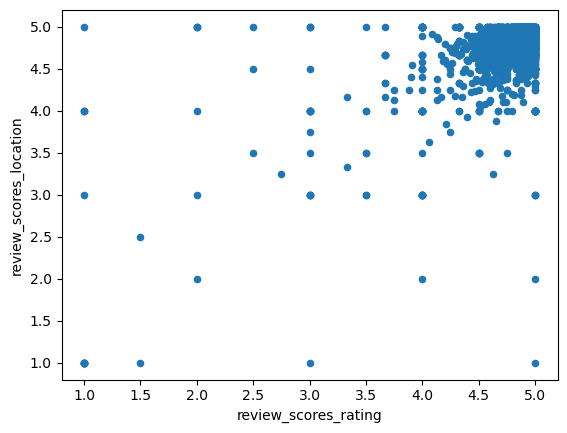

In [86]:
airbnb_denver.plot(x='review_scores_rating', y='review_scores_location', kind='scatter');

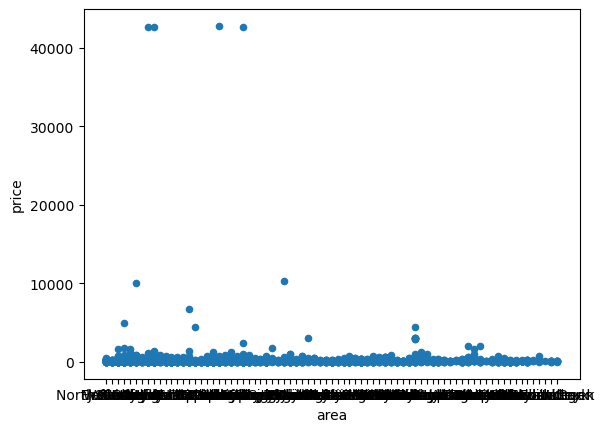

In [87]:
airbnb_denver.plot(x='area', y='price', kind='scatter');

A couple of observations can be made. Recall from the boxplot earlier that the distribution for review_scores_rating and review_scores_location seemed equal. Is this confirmed in the actual data for each neighborhood?

In [88]:
airbnb_denver.shape

(4889, 22)

### 2.10.1 Number and Percentage of Missing Values  <a id='2.10.1_Number_and_Percentage_of_Missing_Values'></a>

Having dropped rows missing the desired target ticket price, what degree of missingness do you have for the remaining rows?

In [89]:
missing = pd.concat([airbnb_denver.isnull().sum(axis=1), 100 * airbnb_denver.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
4522,9,40.909091
4098,9,40.909091
4304,9,40.909091
3211,9,40.909091
4873,9,40.909091
2439,9,40.909091
4448,9,40.909091
4034,9,40.909091
4866,9,40.909091
3226,9,40.909091


These seem possibly curiously quantized...

In [90]:
missing['%'].unique()

array([ 0.        , 36.36363636,  4.54545455, 40.90909091])

In [91]:
missing['%'].value_counts()

0.000000     4115
36.363636     708
4.545455       54
40.909091      12
Name: %, dtype: int64

In [92]:
airbnb_denver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4889 entries, 0 to 4970
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4889 non-null   float64
 1   description                  4889 non-null   object 
 2   host_id                      4889 non-null   int64  
 3   area                         4889 non-null   object 
 4   latitude                     4889 non-null   float64
 5   longitude                    4889 non-null   float64
 6   property_type                4889 non-null   object 
 7   room_type                    4889 non-null   object 
 8   bathrooms                    4887 non-null   float64
 9   bedrooms                     4826 non-null   float64
 10  number_of_reviews            4889 non-null   int64  
 11  last_scraped                 4889 non-null   object 
 12  review_scores_rating         4169 non-null   float64
 13  review_scores_accu

There are still some missing values, and it's good to be aware of this, but leave them as is for now.

## 2.11 Save data<a id='2.12_Save_data'></a>

In [93]:
airbnb_denver.shape

(4889, 22)

Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [94]:
airbnb_denver.to_csv('airbnb_denver_clean.csv')

In [95]:
denver_summary.to_csv('denver_summary_clean.csv')

## 2.12 Summary<a id='2.13_Summary'></a>

When I watched raw data at first sight, there are a lot of non-organized data. I used ‘isnull’ to find empty cells and I calculate the percent of empty cells in each column. Next, I checked out area. 

Distribution of airbnb_denver by area, property_typem and room_type was important.

I made 'Derive area-wide Summary Statistics for Our Market Segment' . I dropped rows with no price data. I found out about about 1% of the rows hadn’t had no price data.

'Population Area' part was investigated by Wikipedia. I extract population) columns. When I runed set(neighbourhood_summary.neighbourhood_cleansed) - set(denver_neighborhoods_sub.denver_neighborhoods), There were two values that join to each other in denver_neighborhoods_sub. I decided to combine those rows to a row in neighbourhood_summary.


Finally, I want to find to go EDA part and find the best model that can perfectly predict the price. 

